**INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY**

**Escuela de Ingeniería y Ciencias - Ingeniería en Ciencia de Datos y Matemáticas**

## Evidencia Final
### Proyecto de aprendizaje supervisado
Modelación del aprendizaje con inteligencia artificial (Gpo 302) - TC2034.302

**Profesora:** Dra. María Valentina Narváez Terán

**Equipo 3**

Annette Pamela Ruiz Abreu - A01423595

Leslie Ramos Gutiérrez - A01562461

Rodrigo González Zermeño - A00572213

Sarah Dorado Romo - A01540946

Monterrey, Nuevo León. 04 de junio de 2023


In [232]:
# Librerías
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import pickle
from mpl_toolkits.mplot3d import Axes3D

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn import metrics 


Datos: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [85]:
# Cargar datos
raw_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Exploración de datos (crudos)

In [86]:
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [130]:
raw_data.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [87]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [88]:
raw_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [89]:
print("Cantidad de filas:", len(raw_data))
print("Cantidad de columnas:", len(raw_data.columns))

Cantidad de filas: 5110
Cantidad de columnas: 12


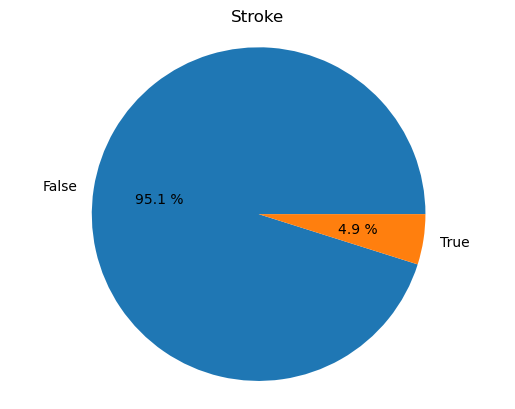

In [90]:
# Exploración de columna de interés (label)

raw_data["stroke"].value_counts()
plt.pie(raw_data["stroke"].value_counts(),labels=["False","True"], autopct="%0.1f %%")
plt.axis("equal")
plt.title("Stroke")
plt.show()

In [91]:
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [92]:
for i in raw_data.drop(labels=["id", "age", "avg_glucose_level", "bmi"], axis=1):
    display(pd.DataFrame(raw_data[i].value_counts()))


,gender
Female,2994
Male,2115
Other,1


,hypertension
0,4612
1,498


,heart_disease
0,4834
1,276


,ever_married
Yes,3353
No,1757


,work_type
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


,Residence_type
Urban,2596
Rural,2514


,smoking_status
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


,stroke
0,4861
1,249


## Limpieza de datos

In [93]:
datos = raw_data
no_bmi = datos[datos["bmi"].isna()]

# Quitamos filas con algún dato vacío
datos = datos.dropna().drop("id", axis=1).reset_index(drop=True)

# Eliminamos el dato que no tiene género (dice "Otro")
datos = datos.drop(2970)

datos.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [94]:
# Transformación de datos para optimizar memoria

datos["gender"] = datos["gender"].astype("category")
datos["hypertension"] = datos["hypertension"].astype("bool")
datos["heart_disease"] = datos["heart_disease"].astype("bool")
datos["ever_married"] = datos["ever_married"].replace({"Yes":1, "No":0}).astype("bool")
datos["work_type"] = datos["work_type"].astype("category")
datos["Residence_type"] = datos["Residence_type"].astype("category")
datos["smoking_status"] = datos["smoking_status"].astype("category")
datos["stroke"] = datos["stroke"].astype("bool")


## Exploración de datos limpios

In [95]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4908 non-null   category
 1   age                4908 non-null   float64 
 2   hypertension       4908 non-null   bool    
 3   heart_disease      4908 non-null   bool    
 4   ever_married       4908 non-null   bool    
 5   work_type          4908 non-null   category
 6   Residence_type     4908 non-null   category
 7   avg_glucose_level  4908 non-null   float64 
 8   bmi                4908 non-null   float64 
 9   smoking_status     4908 non-null   category
 10  stroke             4908 non-null   bool    
dtypes: bool(4), category(4), float64(3)
memory usage: 192.4 KB


In [96]:
print("Cantidad de filas:", len(datos))
print("Cantidad de columnas:", len(datos.columns))

Cantidad de filas: 4908
Cantidad de columnas: 11


In [97]:
# Exploración datos cuantitativos
datos.describe()


,age,avg_glucose_level,bmi
count,4908.000000,4908.000000,4908.00000
mean,42.868810,105.297402,28.89456
std,22.556128,44.425550,7.85432
min,0.080000,55.120000,10.30000
25%,25.000000,77.067500,23.50000
50%,44.000000,91.680000,28.10000
75%,60.000000,113.495000,33.10000
max,82.000000,271.740000,97.60000


In [98]:
pd.DataFrame(datos.agg(stat.mode)).rename(columns={0:"mode"})

,mode
gender,Female
age,78.0
hypertension,False
heart_disease,False
ever_married,True
work_type,Private
Residence_type,Urban
avg_glucose_level,93.88
bmi,28.7
smoking_status,never smoked


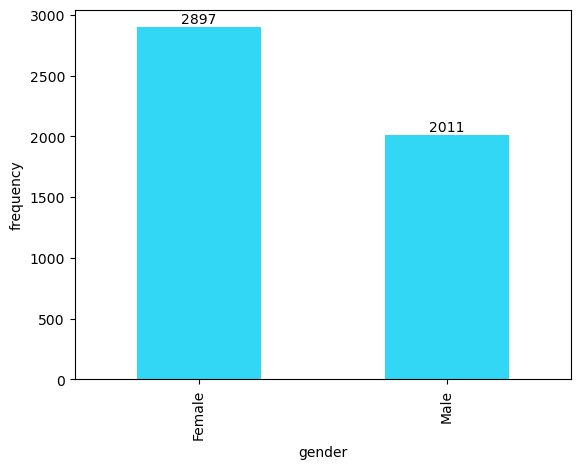

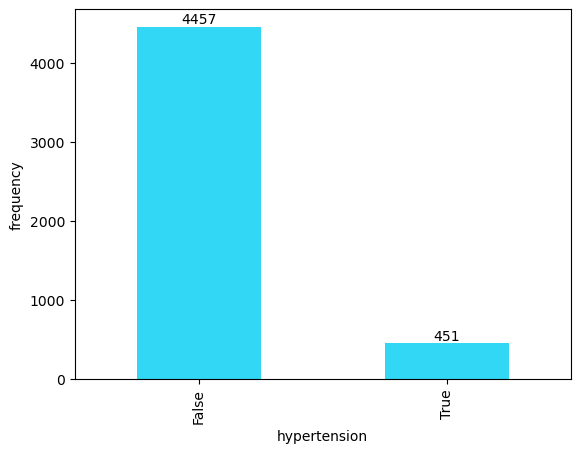

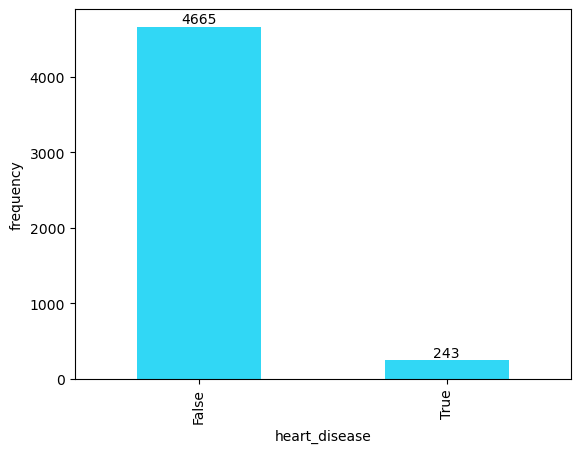

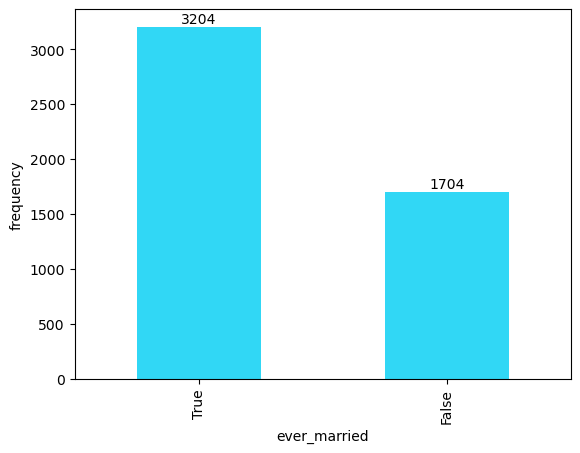

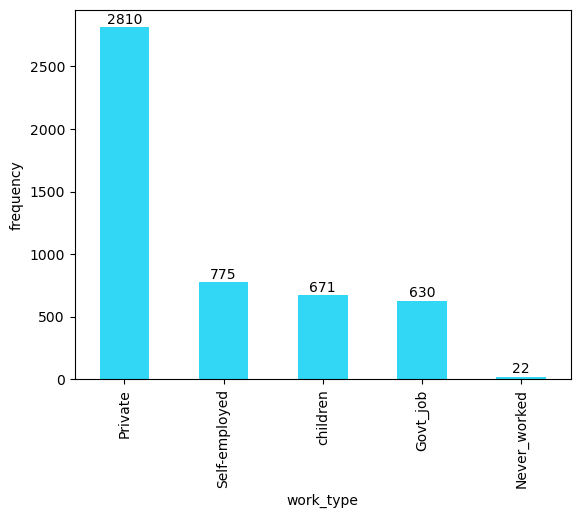

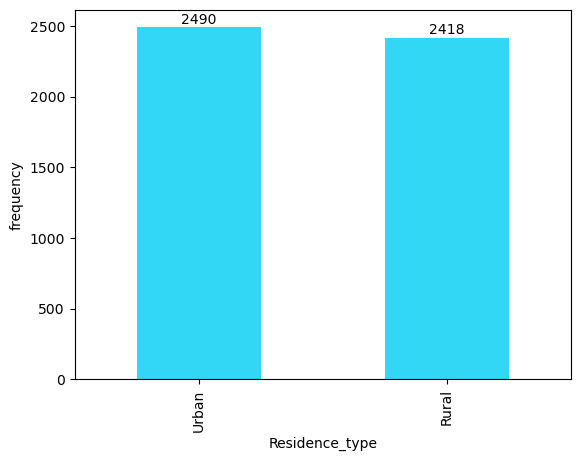

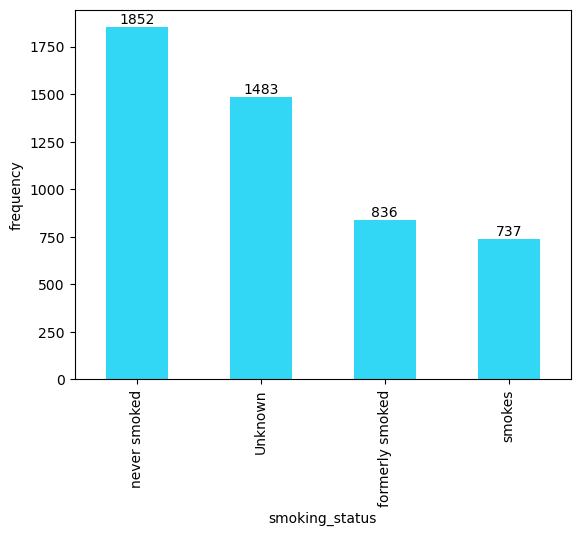

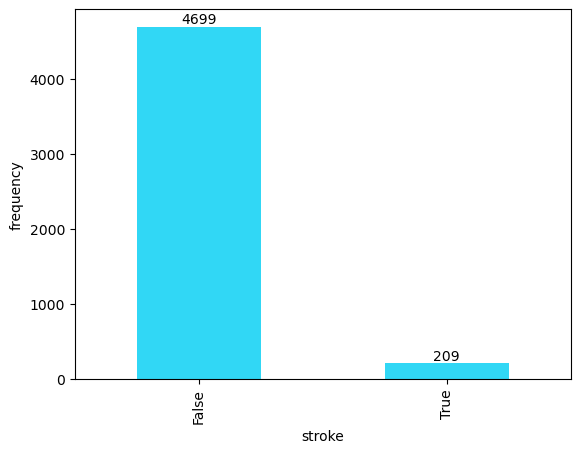

In [99]:
# Exploración variables cualitativas

for i in datos.drop(labels=["age", "avg_glucose_level", "bmi"], axis=1):
    fig = datos[i].value_counts().plot(kind='bar', xlabel=i , ylabel='frequency', color="#31d7f5")
    rects = fig.patches

    # Make some labels.
    labels = [j for j in datos[i].value_counts()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        fig.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )

    plt.show()
    print("\n\n")


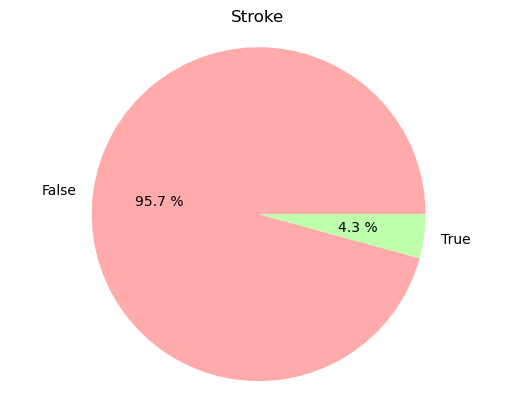

In [124]:
# Exploración de columna de interés (label)

datos["stroke"].value_counts()
plt.pie(datos["stroke"].value_counts(),labels=["False","True"], autopct="%0.1f %%", colors=['#ffabab', '#beffab'])
plt.axis("equal")
plt.title("Stroke")
plt.show()

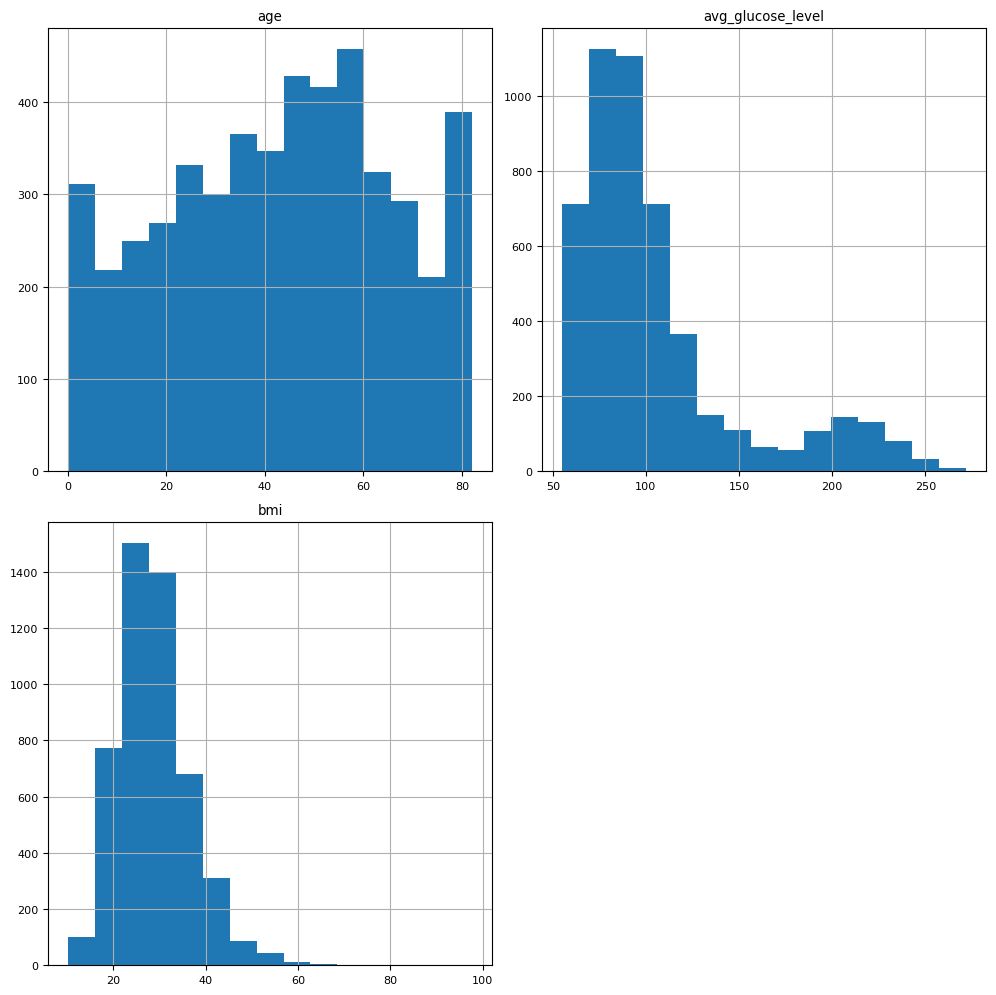

In [225]:
datos.hist(bins=15, figsize=(10,10))
plt.tight_layout()


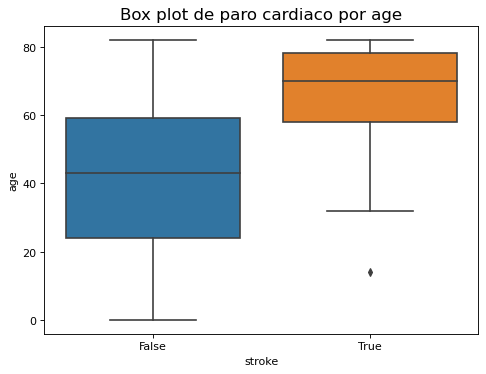

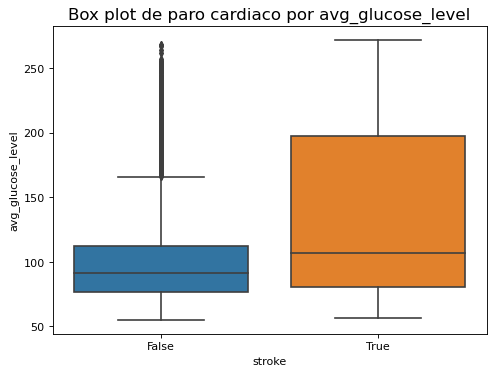

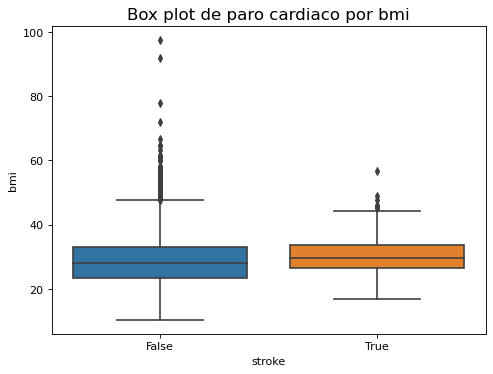

In [122]:
# Boxplots
cuantitativas = ["age", "avg_glucose_level", "bmi"]

for i in cuantitativas:
    plt.figure(figsize=(7,5), dpi= 80)
    sns.boxplot(x='stroke', y=i, data=datos, notch=False)
    title = 'Box plot de paro cardiaco por '+i
    plt.title(title, fontsize=15)
    plt.show()



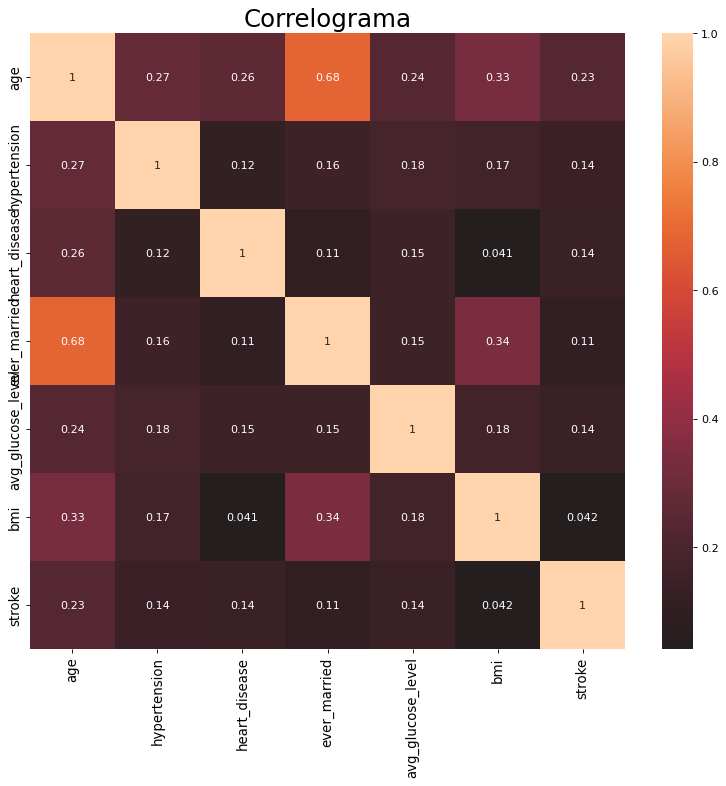

In [106]:
# Gráfica de correlación
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(datos.corr(), xticklabels=datos.corr().columns, yticklabels=datos.corr().columns, center=0, annot=True)
plt.title('Correlograma', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Modelos de aprendizaje supervisado

### Clasificación - regresión logística

In [233]:
X = datos.drop(columns=["stroke"])
y = datos["stroke"]

In [234]:
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=1)

### Árbol de decisión

### SVM

### K-nearest neighbor